## Assignment_07_K-Means Clustering Crime Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
# import dataset
crime=pd.read_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\7-Clustering\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
crime_norm=norm_func(crime.iloc[:,1:])

In [7]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 


In [9]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)

C:\Users\ammaurya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


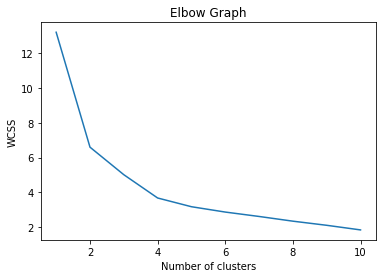

In [10]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster Algorithm using K=4

In [11]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(crime_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [12]:
clusters4.labels_

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [14]:
# Assign clusters to the data set
crime2=crime.copy()
crime2['clusters4id']=clusters4.labels_
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters4id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [15]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [16]:
# Group data by Clusters (K=4)
crime2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,5.656250,138.875000,73.875000,18.781250
2,2,10.815385,257.384615,76.000000,33.192308
3,3,13.937500,243.625000,53.750000,21.412500


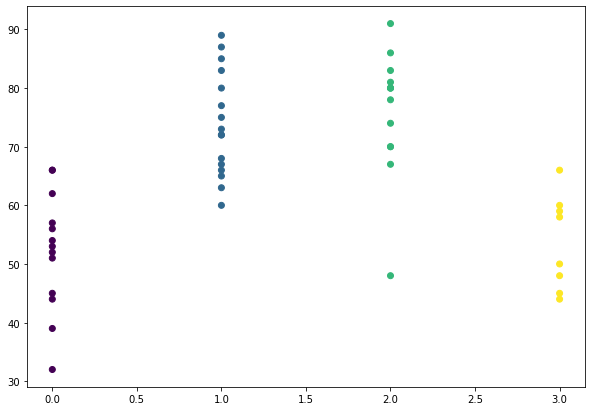

In [18]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clusters4id'],crime2['UrbanPop'], c=clusters4.labels_) 

## Build Cluster Algorithm using K=5

In [19]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(crime_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [16]:
clusters5.labels_

array([4, 4, 4, ..., 1, 0, 0])

In [20]:
# Assign clusters to the data set
crime3=crime2.copy()
crime3['clusters5id']=clusters5.labels_
crime3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters4id,clusters5id
0,Alabama,13.2,236,58,21.2,3,4
1,Alaska,10.0,263,48,44.5,2,3
2,Arizona,8.1,294,80,31.0,2,3
3,Arkansas,8.8,190,50,19.5,3,1
4,California,9.0,276,91,40.6,2,3
5,Colorado,7.9,204,78,38.7,2,3
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,2,3
9,Georgia,17.4,211,60,25.8,3,4


In [21]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.3939759 , 0.38356164, 0.53050847, 0.33953488],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388]])

In [22]:
# Group data by Clusters (K=5)
crime3.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Murder,Assault,UrbanPop,Rape,clusters4id
,,mean,mean,mean,mean,mean
0,0,4.955556,125.444444,80.111111,17.788889,1.0
1,1,7.340000,157.000000,63.300000,20.440000,1.2
2,2,3.091667,76.000000,52.083333,11.833333,0.0
3,3,10.966667,264.000000,76.500000,33.608333,2.0
4,4,14.671429,251.285714,54.285714,21.685714,3.0


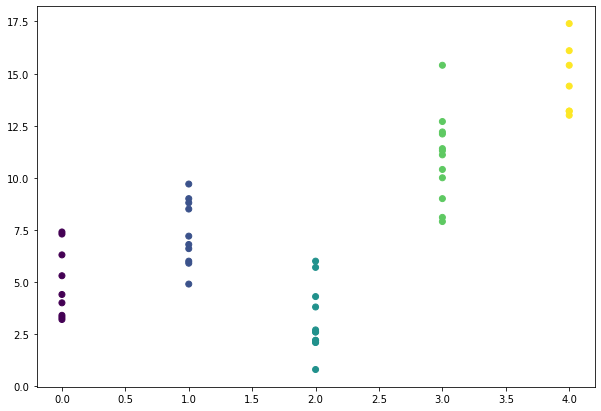

In [23]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['clusters5id'],crime3['Murder'], c=clusters5.labels_)